# Aerofit-Business Case 


### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business

### Importing necessary Python Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Importing the Aerofit File

In [7]:
df = pd.read_csv("aerofit.csv")


In [8]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [9]:
df.shape

(180, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [11]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### There are no null values in the data

In [13]:
round(df.describe(),2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [14]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [15]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

### Data Preparation-Adding / Modifying columns 

#### Product price according to the models
Product Portfolio








1. The KP281 is an entry-level treadmill that sells for $1,500.

2. The KP481 is for mid-level runners that sell for $1,750.

3. The KP781 treadmill is having advanced features that sell for $2,500.

In [16]:
product_price = pd.DataFrame({
 "Product":["KP281","KP481","KP781"],
 "Product_price":[1500,1750,2500]
 })

product_price

,Product,Product_price
0,KP281,1500
1,KP481,1750
2,KP781,2500


In [17]:
df = df.merge(product_price, on="Product", how="left")

In [18]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [19]:
df["Fitness_category"] = df['Fitness']

In [20]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,1500,4
1,KP281,19,Male,15,Single,2,3,31836,75,1500,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,3
3,KP281,19,Male,12,Single,3,3,32973,85,1500,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,2


In [21]:
df["Fitness_category"].replace({1:"Poor Shape",
 5:"Excellent Shape",
4:"Good Shape",
3:"Average Shape",
2:"Bad Shape"},inplace=True)

In [22]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Bad Shape


In [23]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles,Product_price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


In [24]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107
Fitness_category,180,5,Average Shape,97


#### Insights:


1. The median age of a customer is 26 years.
2. The top-selling product is KP281, with the highest number of units sold being 80.
3. The maximum number of treadmill users are married men.
4. The average usage of a treadmill by a customer is 3 times per week.
5. The average fitness level of the customers is 3, which places them in the "Average Shape" category.
6. The average number of miles a customer walks or runs on a treadmill is 94 miles.
7. The average income of the customers is $50,596.5.







## Customer Analysis

### Gender Distribution

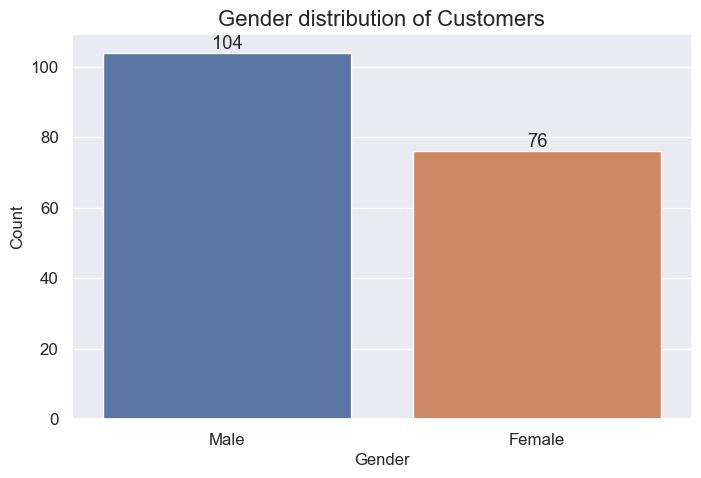

In [68]:
plt.figure(figsize=(8,5))
label = sns.countplot(data = df , x = "Gender") 
for i in label.containers:
    label.bar_label(i)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Gender distribution of Customers",fontdict ={"fontsize": 16})
plt.show()


### Insights:

More males than females are users of treadmills( 57.7%)


### Marital Status based Customer distribution

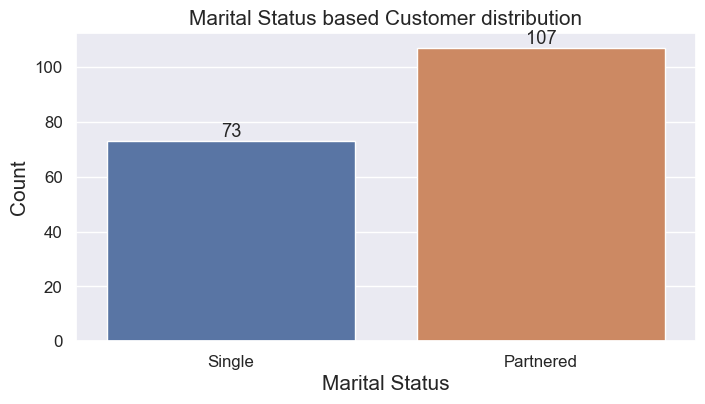

In [36]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(8,4))
label = sns.countplot(data = df , x = "MaritalStatus")
for i in label.containers:
    label.bar_label(i)
plt.xlabel("Marital Status", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Marital Status based Customer distribution",fontdict ={"fontsize": 15})
plt.show()

### Insights:
About 107 treadmill users are married, making up the majority

### Miles based customers distribution

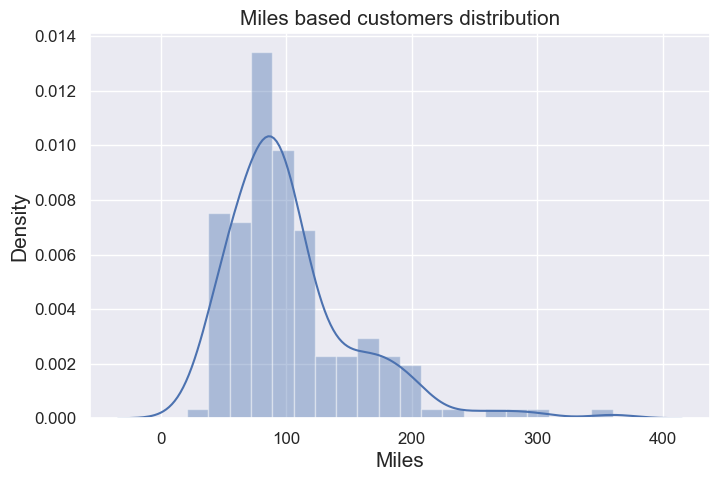

In [45]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(8,5))
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Density",fontsize=15)

sns.distplot(df["Miles"])
plt.title("Miles based customers distribution",fontdict ={"fontsize": 15})
plt.show()

### Income based Customer distribution

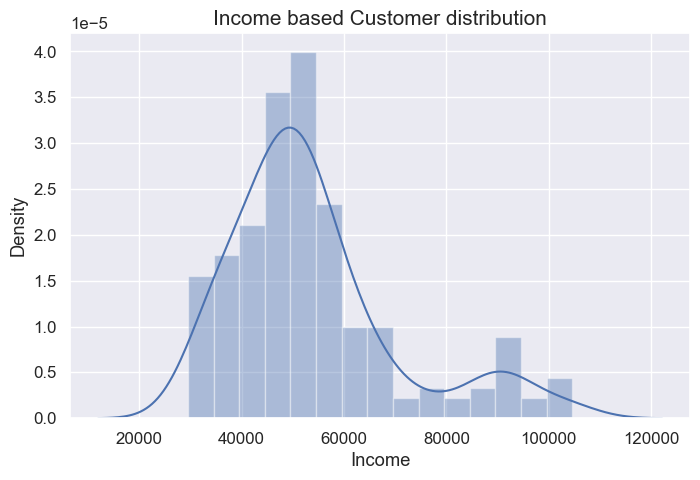

In [47]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(8,5))
sns.distplot(df["Income"])
plt.title("Income based Customer distribution",fontdict ={"fontsize": 15})
plt.show()

### Income based Gender distribution

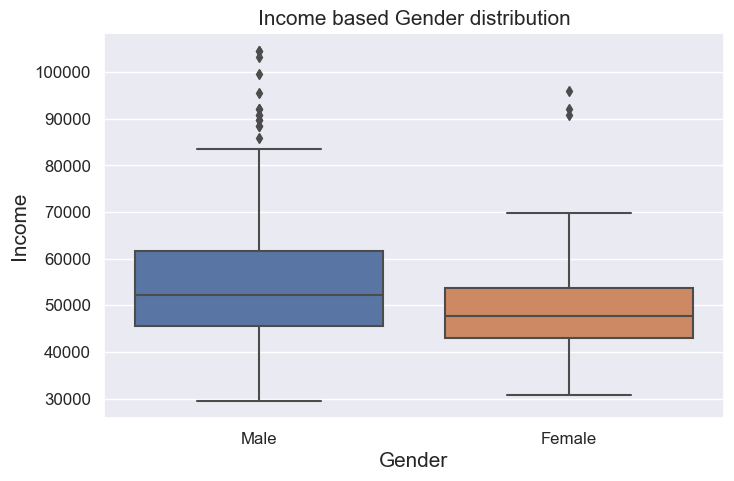

In [71]:
plt.figure(figsize=(8,5))
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Income",fontsize=15)
sns.boxplot(x= 'Gender', y='Income', data=df)
plt.title("Income based Gender distribution",fontdict ={"fontsize": 15})
plt.show()

In [52]:
df_new = df[df['Income'] > 83000]
df_new

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price,Fitness_category
159,KP781,27,Male,16,Partnered,4,5,83416,160,2500,Excellent Shape
160,KP781,27,Male,18,Single,4,3,88396,100,2500,Average Shape
161,KP781,27,Male,21,Partnered,4,4,90886,100,2500,Good Shape
162,KP781,28,Female,18,Partnered,6,5,92131,180,2500,Excellent Shape
164,KP781,28,Male,18,Single,6,5,88396,150,2500,Excellent Shape
166,KP781,29,Male,14,Partnered,7,5,85906,300,2500,Excellent Shape
167,KP781,30,Female,16,Partnered,6,5,90886,280,2500,Excellent Shape
168,KP781,30,Male,18,Partnered,5,4,103336,160,2500,Good Shape
169,KP781,30,Male,18,Partnered,5,5,99601,150,2500,Excellent Shape
170,KP781,31,Male,16,Partnered,6,5,89641,260,2500,Excellent Shape


In [53]:
df_new.describe()

,Age,Education,Usage,Fitness,Income,Miles,Product_price
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,34.157895,17.473684,5.000000,4.736842,92701.894737,187.368421,2500.0
std,7.088827,1.711673,0.942809,0.561951,6438.269194,68.543750,0.0
min,27.000000,14.000000,4.000000,3.000000,83416.000000,100.000000,2500.0
25%,28.500000,16.000000,4.000000,5.000000,89018.500000,150.000000,2500.0
50%,31.000000,18.000000,5.000000,5.000000,90886.000000,160.000000,2500.0
75%,39.000000,18.000000,6.000000,5.000000,95687.000000,200.000000,2500.0
max,48.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.0


#### Insights:

1. Nineteen people had an income greater than $83,000, and they preferred buying the product KP781 due to its advanced features.
2. All of these people had a good fitness level of 5, indicating that they are in excellent shape.
3. On average, all of these people were using the treadmill five times per week.


# Product Analysis

### Product Distribution

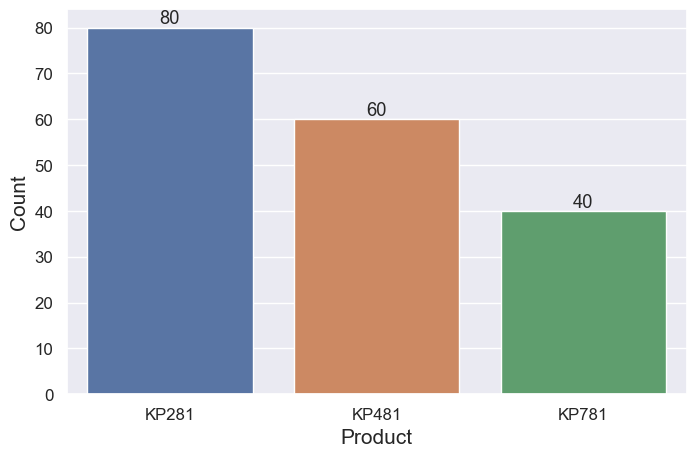

In [72]:
plt.figure(figsize=(8,5))
label = sns.countplot(data = df , x = "Product")
for i in label.containers:
    label.bar_label(i)
plt.xlabel("Product", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

### Revenue based product distribution

In [67]:
product_total_revenue = df.groupby(['Product'])['Product_price'].sum().reset_index().rename(columns=
                                                                                      {'Product':"Product", 
                                                                                       "Product_price":'Product_total_revenue'})

product_total_revenue

,Product,Product_total_revenue
0,KP281,120000
1,KP481,105000
2,KP781,100000


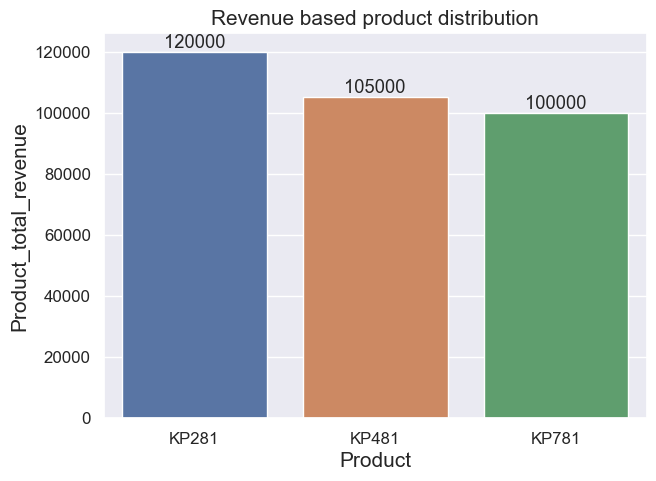

In [66]:
plt.figure(figsize=(7,5))
plt.xlabel("Product",fontsize=15)
plt.ylabel("Product Revenue",fontsize=15)
label = sns.barplot(x= 'Product', y='Product_total_revenue', data= product_total_revenue)
for i in label.containers:
    label.bar_label(i)
plt.title("Revenue based product distribution",fontdict ={"fontsize": 15})
plt.show()

### Insights:

1. KP281 stands out as the top-selling product, while KP781 lags behind as the least sold.
2. KP281 leads in revenue generation, emerging as the highest-earning product.
3. In contrast to the significant gap of 20 units (33%) between the number of KP481 and KP781 products sold, their revenue difference is a mere 5000 USD (4%).


### Product Distribution as per Marital Status

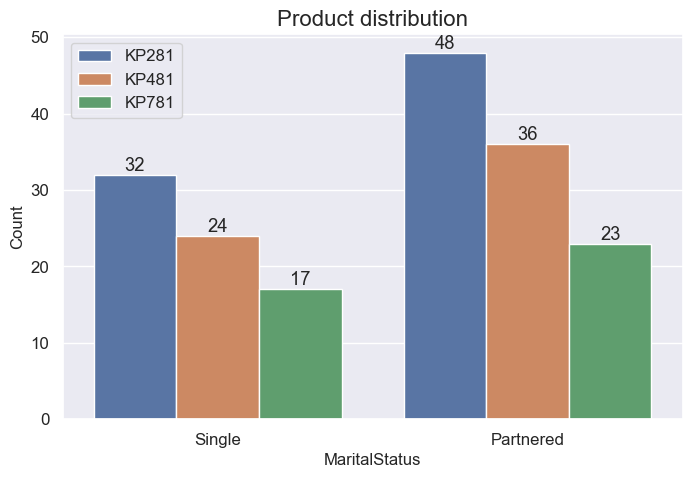

In [69]:
plt.figure(figsize=(8,5))
label = sns.countplot(data = df , x = "MaritalStatus", hue = 'Product') 
for i in label.containers:
    label.bar_label(i)
plt.xlabel("MaritalStatus", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Product distribution",fontdict ={"fontsize": 16})
plt.legend(loc='upper left')
plt.show()

### Insights:
Product KP281 is the most favoured among the married people followed by KP481.

### Gender based product distribution

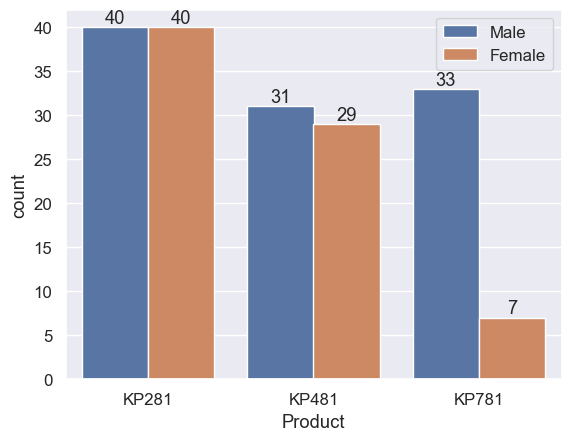

In [70]:
label = sns.countplot(data=df, x = 'Product', hue = 'Gender')
for i in label.containers:
    label.bar_label(i)
plt.legend(loc='upper right')
plt.show()

### Insights:

1. The product KP281 is used by an equal number of males and females.
2. The product KP781 is used very infrequently by females.

### Education based Product distribution

In [75]:
pd.crosstab(df['Education'], df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Education,,,,
12,2,1,0,3
13,3,2,0,5
14,30,23,2,55
15,4,1,0,5
16,39,31,15,85
18,2,2,19,23
20,0,0,1,1
21,0,0,3,3
All,80,60,40,180


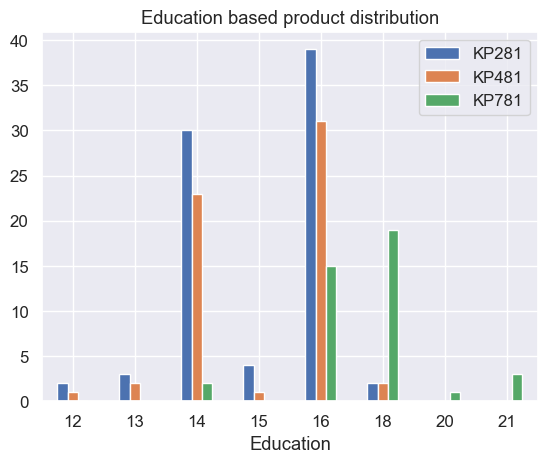

In [76]:
pd.crosstab(df['Education'], df['Product']).plot(kind="bar", stacked=False, rot=0)
plt.title("Education based product distribution")
plt.legend()
plt.show()

### Insights 

1. More people with 14 to 16 years of education like KP281 and KP481 products.

2. People with 16 years of education or more tend to buy KP781.

This happens because education and income are linked positively. Also, when product prices and income are higher, people prefer the more expensive KP781 treadmill.

###    Usage based product distribution

In [77]:
pd.crosstab(df['Usage'], df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Usage,,,,
2,19,14,0,33
3,37,31,1,69
4,22,12,18,52
5,2,3,12,17
6,0,0,7,7
7,0,0,2,2
All,80,60,40,180


In [78]:
pd.crosstab(df['Usage'], df['Product'], normalize='columns')*100

Product,KP281,KP481,KP781
Usage,,,
2,23.75,23.333333,0.0
3,46.25,51.666667,2.5
4,27.50,20.000000,45.0
5,2.50,5.000000,30.0
6,0.00,0.000000,17.5
7,0.00,0.000000,5.0


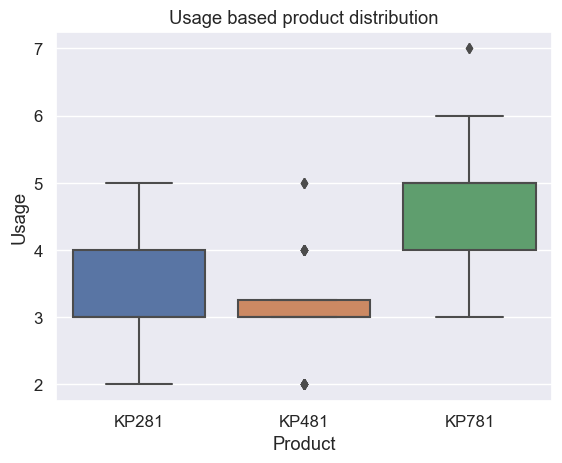

In [80]:
sns.boxplot(x='Product', y='Usage',data=df)
plt.title("Usage based product distribution")
plt.show()

### Insights:

1. Customers who utilize the treadmill 6 to 7 times a week are most inclined to opt for KP781. 
2. Customers those who engage with the products KP281 and KP481 tend to utilize their treadmill 2 to 4 times per week.


### Fitness based product distribution

In [83]:
pd.crosstab(df['Fitness_category'], df['Product'], margins=True)


Product,KP281,KP481,KP781,All
Fitness_category,,,,
Average Shape,54,39,4,97
Bad Shape,14,12,0,26
Excellent Shape,2,0,29,31
Good Shape,9,8,7,24
Poor Shape,1,1,0,2
All,80,60,40,180


In [84]:
pd.crosstab(df['Fitness_category'], df['Product'], normalize='columns')*100

Product,KP281,KP481,KP781
Fitness_category,,,
Average Shape,67.50,65.000000,10.0
Bad Shape,17.50,20.000000,0.0
Excellent Shape,2.50,0.000000,72.5
Good Shape,11.25,13.333333,17.5
Poor Shape,1.25,1.666667,0.0


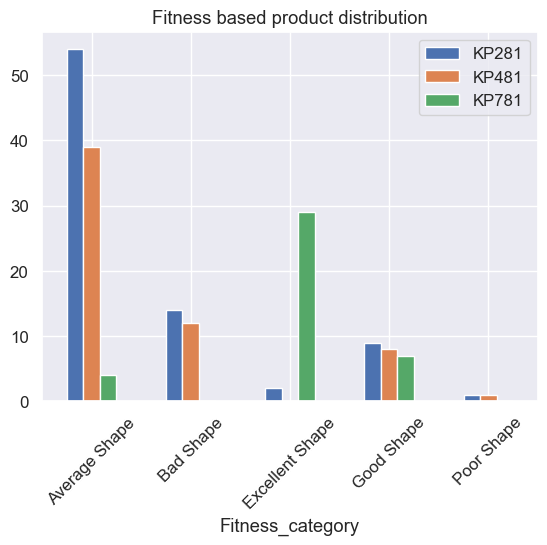

In [86]:
pd.crosstab(df['Fitness_category'], df['Product']).plot(kind="bar", stacked=False, rot=45)
plt.title("Fitness based product distribution")
plt.legend()
plt.show()

### Insights:

1. If an individual is in excellent physical condition, there is a probability exceeding 70% that they are utilizing KP781.
2. The majority of customers who are in average shape use KP281


### Miles based Product distribution

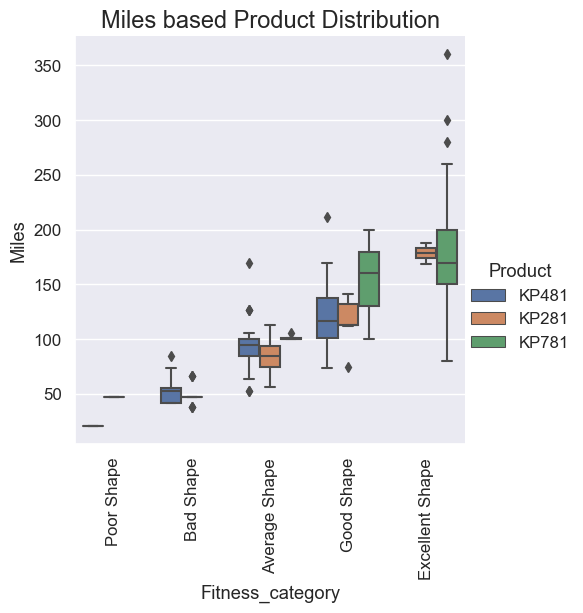

In [95]:
sns.catplot(x= "Fitness_category", y = "Miles" ,kind = "box",hue="Product", data= df.sort_values(by="Fitness"))
plt.xticks(rotation = 90)
plt.title("Miles based Product Distribution",fontdict ={"fontsize": 17})
plt.show()


### Insights:

1. Individuals who cover a distance of over 130 miles through running/walking are highly inclined to opt for the KP781 product.
2. For those who walk/run between 60 and 130 miles, there is a greater likelihood of using the KP281 and KP481 product.

### Recommendations:
If a customer is in average shape and seeking an appropriate product, the KP281 appears to be the preferred option among the majority of customers in similar fitness conditions. So Aerofit can upgrade existing products based on the fitness category and may be add some more functionalities which has a potential increase in sales.


### Correlations between the categories

In [96]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles,Product_price
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.029263
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.563463
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.623124
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.696616
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.695847
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.643923
Product_price,0.029263,0.563463,0.623124,0.696616,0.695847,0.643923,1.000000


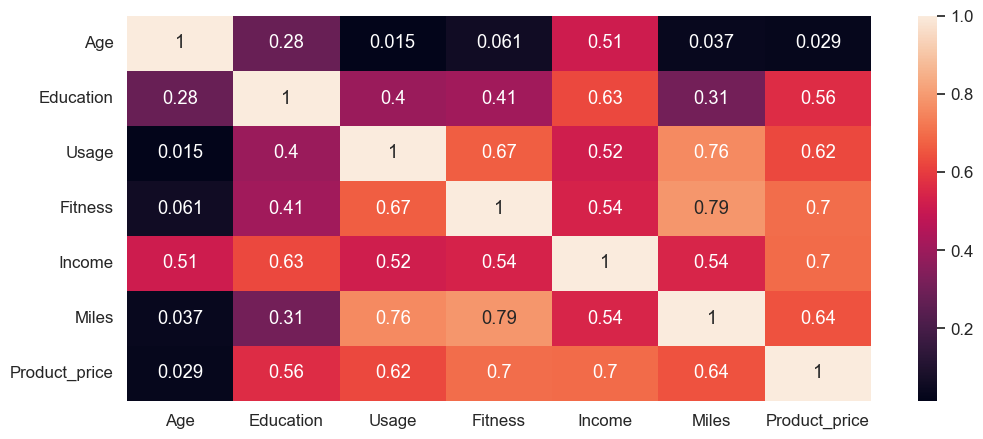

In [100]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Insights:

1. The correlation between Fitness and Miles is strongly positive, measuring at 0.79.

2. There is a notably high positive correlation of 0.7 between Product Price and Income.


### Recommendations:

1. If a customer is looking to improve their fitness level and increase the distance they run or walk, it's important to note that Fitness and Miles exhibit a strong positive correlation of 0.79. This suggests that as their fitness improves, they might be able to cover longer distances more comfortably.

2. When customers consider purchasing a product, it's important to keep in mind the positive correlation of 0.7 between Product Price and Income. If a customer's income allows for it, opting for a higher-priced product might offer additional features or benefits that could enhance their fitness experience.




### Considering all the analysis and observations, we can now formulate customer profiles for the three products

1. **KP281 Customer Profile:**

   - Demographics: Both male and female customers of all ages.
   - Usage: Regularly used 3-4 times a week for walking/running 70-90 miles.
   - Fitness Level: Average shape users seeking a general-purpose fitness solution.
   - Price Range: Affordable entry-level choice suitable for all budgets.
   
  
2. **KP481 Customer Profile:**

   - Demographics: Customers across various age groups, especially females.
   - Usage: Preferred by those who walk/run 70-130+ miles per week with less frequent usage.
   - Fitness Level: Used by individuals with varying fitness levels, from bad to average shape.
   - Price Range: Intermediate pricing, offering a balance between features and cost.
    

3. **KP781 Customer Profile:**

   - Demographics: More likely preferred by males, suitable for singles and adults.
   - Usage: Intensively used 4-5 times a week for walking/running 120-200+ miles.
   - Fitness Level: Ideal for individuals in excellent shape, seeking an extensive exercise solution.
   - Price Range: Higher price range, tailored for customers dedicated to intensive exercise.

